In [8]:
import numpy as np
from PIL import Image
import glob, tqdm, os



# This is the script for convert shadow diff in "mediaN5_5e-2" which is saved in .png (0, 127, 255) to .npy (0, 0.5, 1)
for set_ in ['valid', 'train']:
    path = f"/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2/{set_}"
    out_path = f"/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2_npy/{set_}/"
    os.makedirs(out_path, exist_ok=True)
    files = glob.glob(f"{path}/*.png")
    for f in tqdm.tqdm(files, desc=f"Processing {set_}"):
        fn = os.path.basename(f)
        img = np.array(Image.open(f)).astype(np.float32)
        img[img==127] = 127.5
        img = img / 255.
        np.save(f"{out_path}/{fn.replace('.png', '.npy')}", img)

Processing train: 100%|██████████| 60000/60000 [08:59<00:00, 111.17it/s]


In [11]:
import numpy as np
from PIL import Image
import glob, tqdm, os


# This is the script for convert shadow diff in "mediaN5_5e-2" which is saved in .png (0, 127, 255) to .npy (0, 0.5, 1)
for set_ in ['valid', 'train']:
    path = f"/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2_npy/{set_}"
    out_path = f"/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2_npy_simplified/{set_}/"
    os.makedirs(out_path, exist_ok=True)
    files = glob.glob(f"{path}/*.npy")
    for f in tqdm.tqdm(files, desc=f"Processing {set_}"):
        fn = os.path.basename(f)
        img = np.load(f).astype(np.float32)
        img = 1 - img
        img[img <= 0.6] = 0.
        if len(img.shape) == 2:
            img = img[..., None]
        np.save(f"{out_path}/{fn}", img)

Processing valid:   0%|          | 0/10000 [00:00<?, ?it/s]

Processing train: 100%|██████████| 60000/60000 [05:04<00:00, 196.89it/s]


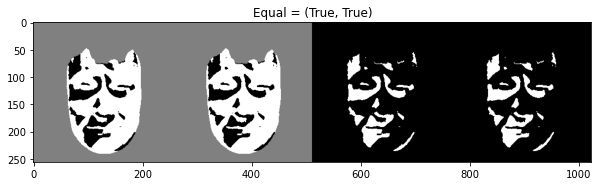

In [14]:
# Plot the before and after converted
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob, tqdm, os

img = '60065'
bf = np.array(Image.open(f'/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2/valid/{img}.png')).astype(np.float32)
bf[bf==127] = 127.5
bf = bf / 255.
af = np.load(f'/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2_npy/valid/{img}.npy')
af_simplified = 1 - af.copy()
af_simplified[af_simplified <= 0.5] = 0
af_simplified_load = np.load(f'/data/mint/DPM_Dataset/ffhq_256_with_anno/shadow_diff/median5_5e-2_npy_simplified/valid/{img}.npy')
plt.figure(figsize=(10, 5))
plt.imshow(np.concatenate([bf, af, af_simplified, af_simplified_load.squeeze(-1)], axis=1), cmap='gray')
plt.title(f"Equal = {np.allclose(bf, af), np.allclose(af_simplified, af_simplified_load.squeeze(-1))}")
plt.show()
